## **Task 1 - Linear Regression Model**

Task : Create a model to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. Also predict the score if a student studies for 9.25 hrs/day

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading data from link
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
print('Data')
Data

Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


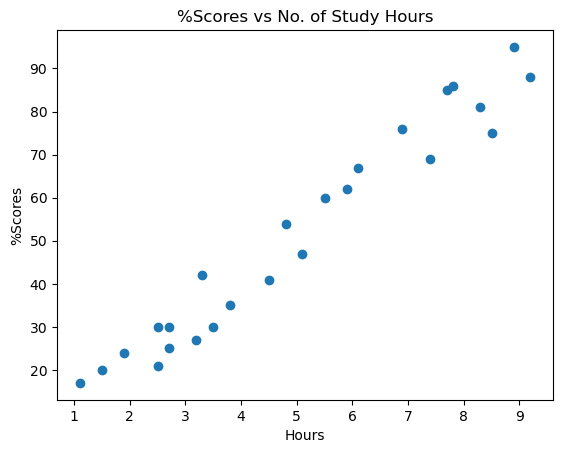

In [4]:
# Plot graph between Hours(x) and Scores(y)
x = Data.Hours 
y = Data.Scores
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('%Scores')
plt.title('%Scores vs No. of Study Hours')
plt.show()

In [5]:
# Split data into testing and training groups
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=21)
print(len(x_train),
len(x_test),
len(y_train),
len(y_test))

22 3 22 3


In [6]:
# Reshaping data to fit the model
x=x_train.to_numpy().reshape(-1,1)
y=y_train.to_numpy().reshape(-1,1)
x_test=x_test.to_numpy().reshape(-1,1)
y_test=y_test.to_numpy().reshape(-1,1)

**Model Training**

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

**Using model to predict values**

In [8]:
y_pred=model.predict(x_test)
y_pred

array([[52.0344975 ],
       [61.8623153 ],
       [34.34442545]])

**Compare predicted values to actual values**

In [10]:
Predicted=pd.DataFrame(y_pred,columns=['Predicted'])
Actual=pd.DataFrame(y_test,columns=['Actual'])
Compare=pd.concat([Predicted.round(1),Actual],axis=1,join='inner')
Compare


,Predicted,Actual
0,52.0,47
1,61.9,67
2,34.3,42


**Predicting for test data**

In [11]:
Hrs=9.25
test_pred=model.predict([[9.25]])
print(f'If a student studies for  {Hrs} hours daily then his predicted score would be {test_pred[0][0].round(2)}')

If a student studies for  9.25 hours daily then his predicted score would be 92.82


**Evaluate the model**

In [12]:
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(Predicted,Actual)
lin_rmse=np.sqrt(lin_mse)
print(f'Mean squared error is {lin_rmse.round(2)}')

Mean squared error is 6.06


**THE END**